In [7]:
import pandas as pd
import numpy as np
from scipy import stats
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.utils import shuffle
from keras.optimizers import RMSprop

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve,confusion_matrix,accuracy_score, auc

from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.preprocessing import StandardScaler

from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from tensorflow import keras
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPool1D
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from imblearn.over_sampling import KMeansSMOTE, SMOTE
from sklearn.model_selection import StratifiedKFold

In [8]:
import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing, metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from keras import backend as K
from keras.models import Model
from keras.layers import Input, Dense, Lambda, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import regularizers
from sklearn.utils import shuffle



In [9]:
# Read the dataset
df = pd.read_csv('F:creditcard.csv')
#check on the size of the dataframe

test_split = 0.1 #portion of data used for testing
 #portion of training data used for validation
    
# We separate the feature vector from the classification result
X = df.drop('Class',axis=1).values
y = df['Class'].values

In [10]:
# Feature scaling
X -= X.min(axis=0)
X /= X.max(axis=0)

In [11]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Fold #1
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (426472, 30)
After OverSampling, the shape of train_y: (426472,) 

After OverSampling, counts of label '1': 213236
After OverSampling, counts of label '0': 213236
After OverSampling, the shape of train_X: (426472, 30)
After OverSampling, the shape of train_y: (426472,) 

After OverSampling, counts of label '1': 213236
After OverSampling, counts of label '0': 213236
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 27)           837         input_2[0][0]                    
______________________________________________________________________________

426472/426472 [==============================] - 24s 56us/step - loss: 15.4026 - rec_loss: 24.7312 - kl_loss: 4.6647 - val_loss: 13.5286 - val_rec_loss: 23.4415 - val_kl_loss: 2.8490
Epoch 70/150
426472/426472 [==============================] - 23s 55us/step - loss: 15.2382 - rec_loss: 24.4149 - kl_loss: 4.6639 - val_loss: 14.2445 - val_rec_loss: 24.7692 - val_kl_loss: 2.9681
Epoch 76/150
426472/426472 [==============================] - 24s 56us/step - loss: 15.4657 - rec_loss: 24.8395 - kl_loss: 4.6743 - val_loss: 13.9498 - val_rec_loss: 24.1824 - val_kl_loss: 2.9686
Epoch 77/150
426472/426472 [==============================] - 24s 56us/step - loss: 15.3527 - rec_loss: 24.6317 - kl_loss: 4.6782 - val_loss: 13.5283 - val_rec_loss: 23.3813 - val_kl_loss: 2.9350
Epoch 78/150
426472/426472 [==============================] - 24s 55us/step - loss: 15.0839 - rec_loss: 24.1031 - kl_loss: 4.6693 - val_loss: 13.7534 - val_rec_loss: 23.7779 - val_kl_loss: 2.9423
Epoch 84/150
426472/426472 [=====

426472/426472 [==============================] - 85s 200us/step - loss: 0.1697 - accuracy: 0.9348 - val_loss: 0.1177 - val_accuracy: 0.9659
Epoch 24/50
426472/426472 [==============================] - 84s 197us/step - loss: 0.1696 - accuracy: 0.9351 - val_loss: 0.1225 - val_accuracy: 0.9656
Epoch 25/50
426472/426472 [==============================] - 85s 199us/step - loss: 0.1695 - accuracy: 0.9350 - val_loss: 0.1142 - val_accuracy: 0.9651
Epoch 26/50
426472/426472 [==============================] - 84s 196us/step - loss: 0.1692 - accuracy: 0.9349 - val_loss: 0.1129 - val_accuracy: 0.9682
Epoch 28/50
426472/426472 [==============================] - 83s 194us/step - loss: 0.1693 - accuracy: 0.9350 - val_loss: 0.1203 - val_accuracy: 0.9660
Epoch 29/50
426472/426472 [==============================] - 82s 193us/step - loss: 0.1688 - accuracy: 0.9351 - val_loss: 0.1113 - val_accuracy: 0.9675
Epoch 30/50
426472/426472 [==============================] - 83s 194us/step - loss: 0.1690 - accurac

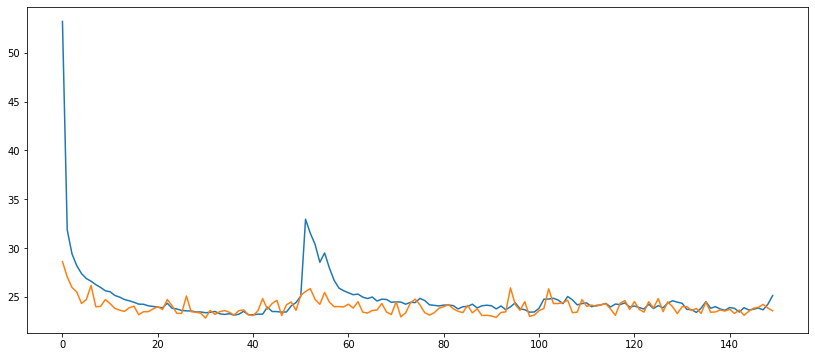

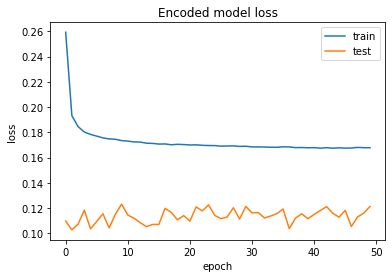

Overall accuracy of Convolutional Neural Network model: 0.9644251565967248


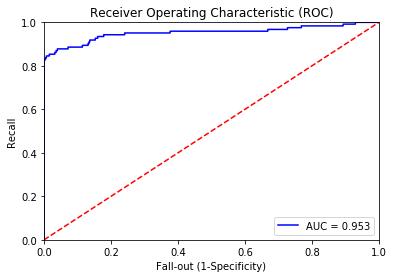

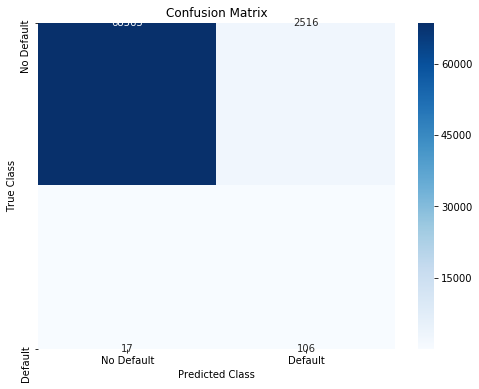

AUC(ROC): 0.9131956919113361
Precision: 0.04042715484363082
Recall: 0.8617886178861789
F1 score: 0.07723132969034609
False positives: 2516
True positives: 106
False negatives: 17
True negatives: 68563
Fold #2
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (426472, 30)
After OverSampling, the shape of train_y: (426472,) 

After OverSampling, counts of label '1': 213236
After OverSampling, counts of label '0': 213236
After OverSampling, the shape of train_X: (426472, 30)
After OverSampling, the shape of train_y: (426472,) 

After OverSampling, counts of label '1': 213236
After OverSampling, counts of label '0': 213236
Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_17 (Dense)                (None, 27)           837         input_4[0][0]                    
______________________________________________________________________________

426472/426472 [==============================] - 24s 57us/step - loss: 15.6797 - rec_loss: 25.2430 - kl_loss: 4.4326 - val_loss: 13.8220 - val_rec_loss: 24.1661 - val_kl_loss: 2.7731
Epoch 16/150
426472/426472 [==============================] - 23s 55us/step - loss: 15.3796 - rec_loss: 24.6491 - kl_loss: 4.4638 - val_loss: 13.7342 - val_rec_loss: 24.0938 - val_kl_loss: 2.7052
Epoch 17/150
426472/426472 [==============================] - 24s 57us/step - loss: 15.2599 - rec_loss: 24.4289 - kl_loss: 4.4682 - val_loss: 13.4879 - val_rec_loss: 23.5234 - val_kl_loss: 2.7967
Epoch 18/150
426472/426472 [==============================] - 23s 54us/step - loss: 15.1951 - rec_loss: 24.3001 - kl_loss: 4.4761 - val_loss: 13.2479 - val_rec_loss: 23.0788 - val_kl_loss: 2.7740
Epoch 19/150
426472/426472 [==============================] - 22s 53us/step - loss: 15.1698 - rec_loss: 24.2613 - kl_loss: 4.4703 - val_loss: 13.4516 - val_rec_loss: 23.5904 - val_kl_loss: 2.6708
Epoch 20/150
426472/426472 [=====

Epoch 101/150
426472/426472 [==============================] - 24s 55us/step - loss: 15.1282 - rec_loss: 24.1474 - kl_loss: 4.8188 - val_loss: 12.6964 - val_rec_loss: 21.3485 - val_kl_loss: 3.4311
Epoch 102/150
426472/426472 [==============================] - 23s 55us/step - loss: 15.1565 - rec_loss: 24.2013 - kl_loss: 4.8248 - val_loss: 12.8877 - val_rec_loss: 21.7319 - val_kl_loss: 3.4185
Epoch 103/150
426472/426472 [==============================] - 24s 56us/step - loss: 14.9042 - rec_loss: 23.7302 - kl_loss: 4.7959 - val_loss: 12.5687 - val_rec_loss: 21.1906 - val_kl_loss: 3.3427
Epoch 104/150
426472/426472 [==============================] - 24s 57us/step - loss: 15.0706 - rec_loss: 24.0700 - kl_loss: 4.7972 - val_loss: 12.6300 - val_rec_loss: 21.3857 - val_kl_loss: 3.2876
Epoch 105/150
426472/426472 [==============================] - 24s 57us/step - loss: 15.0092 - rec_loss: 23.9317 - kl_loss: 4.8103 - val_loss: 12.8057 - val_rec_loss: 21.5980 - val_kl_loss: 3.4260
Epoch 106/150
4

426472/426472 [==============================] - 24s 56us/step - loss: 14.6640 - rec_loss: 23.3493 - kl_loss: 4.7898 - val_loss: 12.7564 - val_rec_loss: 21.8641 - val_kl_loss: 3.1080
Epoch 143/150
426472/426472 [==============================] - 24s 56us/step - loss: 14.3618 - rec_loss: 22.8060 - kl_loss: 4.7644 - val_loss: 12.9625 - val_rec_loss: 22.0429 - val_kl_loss: 3.3528
Epoch 145/150
426472/426472 [==============================] - 24s 55us/step - loss: 14.3059 - rec_loss: 22.6979 - kl_loss: 4.7807 - val_loss: 12.7620 - val_rec_loss: 21.6940 - val_kl_loss: 3.3094
Epoch 147/150
426472/426472 [==============================] - 23s 55us/step - loss: 14.3800 - rec_loss: 22.8447 - kl_loss: 4.7711 - val_loss: 12.8732 - val_rec_loss: 21.7871 - val_kl_loss: 3.3952
Epoch 148/150
426472/426472 [==============================] - 24s 55us/step - loss: 14.5227 - rec_loss: 23.0929 - kl_loss: 4.7753 - val_loss: 12.6822 - val_rec_loss: 21.3414 - val_kl_loss: 3.4459
Train on 426472 samples, vali

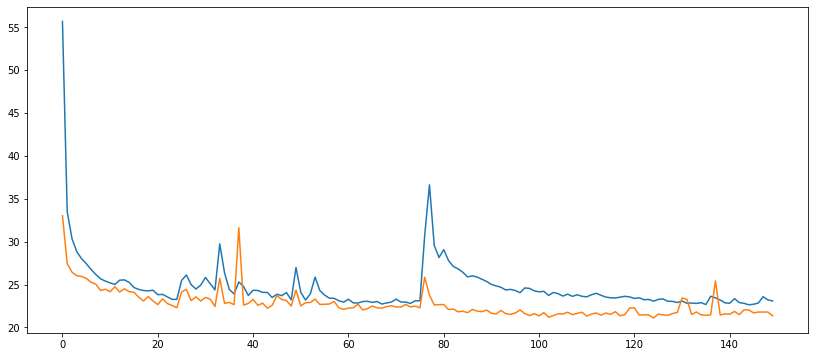

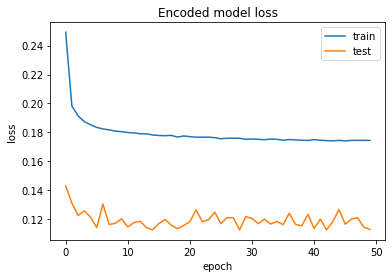

Overall accuracy of Convolutional Neural Network model: 0.9780343248785146


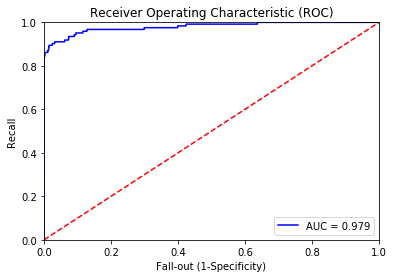

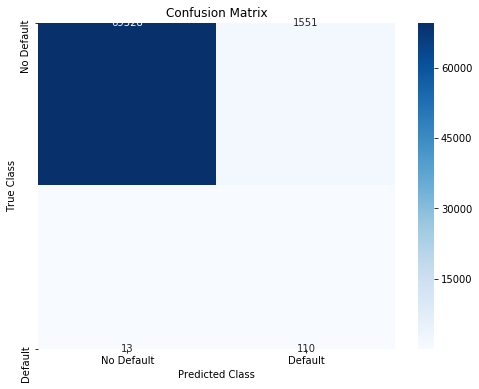

AUC(ROC): 0.9362440760692585
Precision: 0.06622516556291391
Recall: 0.8943089430894309
F1 score: 0.12331838565022422
False positives: 1551
True positives: 110
False negatives: 13
True negatives: 69528
Fold #3
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (426472, 30)
After OverSampling, the shape of train_y: (426472,) 

After OverSampling, counts of label '1': 213236
After OverSampling, counts of label '0': 213236
After OverSampling, the shape of train_X: (426472, 30)
After OverSampling, the shape of train_y: (426472,) 

After OverSampling, counts of label '1': 213236
After OverSampling, counts of label '0': 213236
Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_26 (Dense)                (None, 27)           837         input_6[0][0]                    
______________________________________________________________________________

426472/426472 [==============================] - 24s 57us/step - loss: 14.8608 - rec_loss: 23.8195 - kl_loss: 4.6070 - val_loss: 13.4482 - val_rec_loss: 23.2728 - val_kl_loss: 3.0533
Epoch 44/150
426472/426472 [==============================] - 24s 57us/step - loss: 15.0768 - rec_loss: 24.2698 - kl_loss: 4.5975 - val_loss: 13.1356 - val_rec_loss: 22.7261 - val_kl_loss: 3.0023
Epoch 45/150
426472/426472 [==============================] - 24s 56us/step - loss: 15.4604 - rec_loss: 25.0012 - kl_loss: 4.6357 - val_loss: 13.4478 - val_rec_loss: 23.3271 - val_kl_loss: 3.0208
Epoch 54/150
426472/426472 [==============================] - 24s 56us/step - loss: 14.7328 - rec_loss: 23.5538 - kl_loss: 4.6271 - val_loss: 13.0823 - val_rec_loss: 22.6822 - val_kl_loss: 2.9429
Epoch 55/150
426472/426472 [==============================] - 24s 57us/step - loss: 14.4838 - rec_loss: 23.0970 - kl_loss: 4.6017 - val_loss: 13.0231 - val_rec_loss: 22.4203 - val_kl_loss: 3.0856
Epoch 60/150
426472/426472 [=====

426472/426472 [==============================] - 32s 75us/step - loss: 14.3149 - rec_loss: 22.6990 - kl_loss: 4.6194 - val_loss: 13.1745 - val_rec_loss: 22.8483 - val_kl_loss: 2.9097
Epoch 132/150
426472/426472 [==============================] - 26s 60us/step - loss: 14.0707 - rec_loss: 22.1903 - kl_loss: 4.6581 - val_loss: 12.8210 - val_rec_loss: 22.0212 - val_kl_loss: 3.0365
Epoch 146/150
426472/426472 [==============================] - 29s 67us/step - loss: 14.1346 - rec_loss: 22.2955 - kl_loss: 4.6607 - val_loss: 12.7769 - val_rec_loss: 21.8118 - val_kl_loss: 3.1462
Epoch 147/150
426472/426472 [==============================] - 93s 217us/step - loss: 0.2213 - accuracy: 0.9189 - val_loss: 0.1355 - val_accuracy: 0.9720
Epoch 2/50
426472/426472 [==============================] - 93s 217us/step - loss: 0.1812 - accuracy: 0.9315 - val_loss: 0.1231 - val_accuracy: 0.9681
Epoch 7/50
426472/426472 [==============================] - 93s 218us/step - loss: 0.1808 - accuracy: 0.9318 - val_los

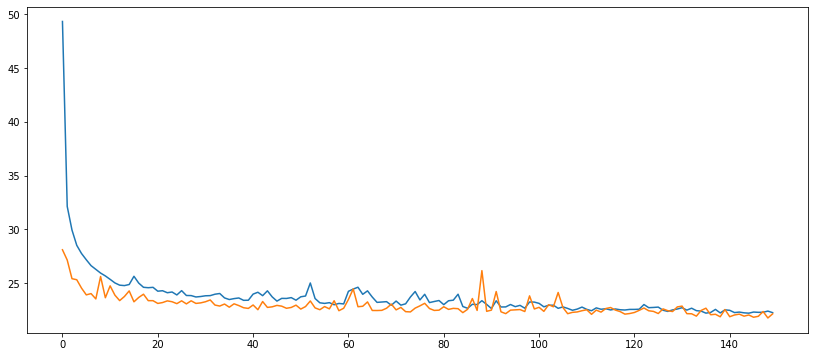

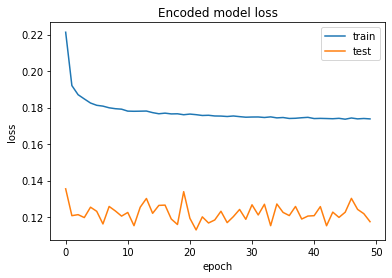

Overall accuracy of Convolutional Neural Network model: 0.9671919328108761


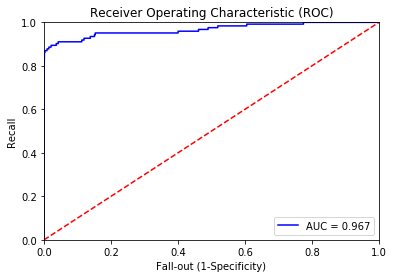

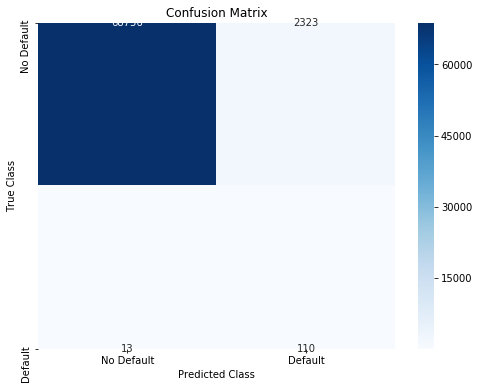

AUC(ROC): 0.9308134988242213
Precision: 0.04521167283189478
Recall: 0.8943089430894309
F1 score: 0.08607198748043818
False positives: 2323
True positives: 110
False negatives: 13
True negatives: 68756
Fold #4
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (426474, 30)
After OverSampling, the shape of train_y: (426474,) 

After OverSampling, counts of label '1': 213237
After OverSampling, counts of label '0': 213237
After OverSampling, the shape of train_X: (426474, 30)
After OverSampling, the shape of train_y: (426474,) 

After OverSampling, counts of label '1': 213237
After OverSampling, counts of label '0': 213237
Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_35 (Dense)                (None, 27)           837         input_8[0][0]                    
______________________________________________________________________________

426474/426474 [==============================] - 24s 57us/step - loss: 15.1668 - rec_loss: 24.6958 - kl_loss: 4.3180 - val_loss: 13.7621 - val_rec_loss: 24.2782 - val_kl_loss: 2.6989
Epoch 16/150
426474/426474 [==============================] - 24s 57us/step - loss: 15.0991 - rec_loss: 24.5693 - kl_loss: 4.3302 - val_loss: 13.4612 - val_rec_loss: 23.6885 - val_kl_loss: 2.7064
Epoch 17/150
426474/426474 [==============================] - 24s 57us/step - loss: 15.0383 - rec_loss: 24.4712 - kl_loss: 4.3272 - val_loss: 13.3298 - val_rec_loss: 23.5788 - val_kl_loss: 2.5557
Epoch 18/150
426474/426474 [==============================] - 25s 58us/step - loss: 14.9712 - rec_loss: 24.3321 - kl_loss: 4.3334 - val_loss: 13.9543 - val_rec_loss: 24.7176 - val_kl_loss: 2.6644
Epoch 19/150
426474/426474 [==============================] - 25s 58us/step - loss: 14.8671 - rec_loss: 24.1029 - kl_loss: 4.3584 - val_loss: 13.4137 - val_rec_loss: 23.5485 - val_kl_loss: 2.7489
Epoch 20/150
426474/426474 [=====

426474/426474 [==============================] - 24s 57us/step - loss: 14.5224 - rec_loss: 23.0654 - kl_loss: 4.6675 - val_loss: 13.0481 - val_rec_loss: 22.6926 - val_kl_loss: 2.8570
Epoch 57/150
426474/426474 [==============================] - 24s 56us/step - loss: 14.3994 - rec_loss: 22.8337 - kl_loss: 4.6652 - val_loss: 13.1630 - val_rec_loss: 22.8349 - val_kl_loss: 2.9351
Epoch 58/150
426474/426474 [==============================] - 24s 57us/step - loss: 14.4466 - rec_loss: 22.9266 - kl_loss: 4.6549 - val_loss: 13.2995 - val_rec_loss: 23.0913 - val_kl_loss: 2.9420
Epoch 59/150
426474/426474 [==============================] - 24s 57us/step - loss: 14.4628 - rec_loss: 22.9442 - kl_loss: 4.6743 - val_loss: 13.7582 - val_rec_loss: 23.9650 - val_kl_loss: 2.9921
Epoch 60/150
426474/426474 [==============================] - 24s 56us/step - loss: 14.3609 - rec_loss: 22.7577 - kl_loss: 4.6585 - val_loss: 12.9100 - val_rec_loss: 22.2802 - val_kl_loss: 2.9868
Epoch 61/150
426474/426474 [=====

Epoch 138/150
426474/426474 [==============================] - 24s 55us/step - loss: 13.7783 - rec_loss: 21.7067 - kl_loss: 4.6790 - val_loss: 12.6941 - val_rec_loss: 21.9367 - val_kl_loss: 2.9384
Epoch 140/150
426474/426474 [==============================] - 24s 55us/step - loss: 13.7645 - rec_loss: 21.6560 - kl_loss: 4.6835 - val_loss: 12.9288 - val_rec_loss: 22.3660 - val_kl_loss: 2.9570
Epoch 141/150
426474/426474 [==============================] - 24s 56us/step - loss: 13.7728 - rec_loss: 21.6715 - kl_loss: 4.7011 - val_loss: 12.7633 - val_rec_loss: 22.0765 - val_kl_loss: 2.9573
Epoch 145/150
426474/426474 [==============================] - 23s 55us/step - loss: 13.7316 - rec_loss: 21.5992 - kl_loss: 4.7048 - val_loss: 12.6685 - val_rec_loss: 21.7257 - val_kl_loss: 3.1026
Epoch 147/150
426474/426474 [==============================] - 24s 55us/step - loss: 13.7347 - rec_loss: 21.6112 - kl_loss: 4.6984 - val_loss: 12.8597 - val_rec_loss: 22.2766 - val_kl_loss: 2.9360
Epoch 148/150
4

In [12]:
encoding_dim_1 = 27
encoding_dim_2 = 24
encoding_dim_3 = 21
#encoding_dim_4 = 20
#encoding_dim_5 = 18
hidden_dim = 15 #size of the hidden layer in encoder and decoder
latent_dim = 2 #number of latent variables to learn
learning_rate = 1e-3

#Cross_Validate

kf = StratifiedKFold(4, shuffle = True, random_state=42) # Use for Kfold Validation

tn_summary=[]
fp_summary=[]
fn_summary=[]
tp_summary=[]

def Average(lst): 
    return sum(lst) / len(lst)
    

fold = 0

for train, test in kf.split(X,y):
    fold +=1
    print(f"Fold #{fold}")
    
    
    
    x_train = X[train]
    y_train = y[train]
    x_test = X[test]
    y_test = y[test]

    
    scaler = preprocessing.StandardScaler()

    x_train, x_test = scaler.fit_transform(x_train), scaler.fit_transform(x_test) 
    
    
    print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
    print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

    sm = SMOTE()
    X_res_train, y_train_res = sm.fit_sample(x_train, y_train.ravel())

    print('After OverSampling, the shape of train_X: {}'.format(X_res_train.shape))
    print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

    print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
    print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
    
    sm=KMeansSMOTE()
    
    X_res_train, y_train_res = sm.fit_sample(X_res_train, y_train_res.ravel())

    print('After OverSampling, the shape of train_X: {}'.format(X_res_train.shape))
    print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

    print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
    print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
    

    input_dim = X_res_train.shape[1]
    x = input_dim

    input_layer = Input(shape=(input_dim,))

    encoder = Dense(encoding_dim_1, activation='tanh',activity_regularizer=regularizers.l1(learning_rate))(input_layer)
    encoder = BatchNormalization()(encoder)

    encoder = Dense(encoding_dim_2, activation='tanh')(encoder)
    encoder = BatchNormalization()(encoder)

    encoder = Dense(encoding_dim_3, activation='tanh')(encoder)
    encoder = BatchNormalization()(encoder)

    #encoder = Dense (encoding_dim_4, activation = 'tanh')(encoder)
    #encoder = BatchNormalization()(encoder)

    #encoder = Dense (encoding_dim_5, activation = 'tanh')(encoder)
    #encoder = BatchNormalization()(encoder)

    encoder = Dense(hidden_dim, activation='tanh' , name='encoder_hidden')(encoder)
    encoder = BatchNormalization()(encoder)

    z_mean = Dense(latent_dim, name='z_mean')(encoder)
    z_log_var = Dense(latent_dim, name='z_log_var')(encoder)
    
    def sampling(args):
        z_mean, z_log_var = args
        epsilon = K.random_normal(shape=K.shape(z_mean), mean=0., stddev=1.)
        return z_mean + K.exp(z_log_var / 2) * epsilon

    z = Lambda(sampling, name='z_sampled')([z_mean, z_log_var])
    t = BatchNormalization()(z)

    decoder1 = Dense(hidden_dim, activation='tanh')(t)
    decoder1 = BatchNormalization()(decoder1) 

    #decoder = Dense(encoding_dim_5, activation = 'tanh')(decoder)
    #decoder = BatchNormalization()(decoder)

    #decoder = Dense(encoding_dim_4, activation = 'tanh')(decoder)
    #decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_3, activation='tanh')(decoder1)
    decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_2, activation='tanh')(decoder)
    decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_1, activation='tanh')(decoder)
    decoder = BatchNormalization()(decoder)


    decoded_mean = Dense(input_dim, activation=None, name='decoded_mean')(decoder)


    vae = Model(inputs=input_layer, outputs=decoded_mean)
    
    def rec_loss(y_true, y_pred):
        return K.sum(K.square(y_true - y_pred), axis=-1)

    def kl_loss(y_true, y_pred):
        return - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)

    def vae_loss(x, decoded_mean):
        rec_loss = K.sum(K.square(x - decoded_mean), axis=-1)
        kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
        return K.mean((rec_loss + kl_loss) / 2)

    vae.compile(optimizer=RMSprop(lr=learning_rate), loss=vae_loss, metrics=[rec_loss, kl_loss])
    vae.summary()
    
    n_epochs = 150
    batch_size = 128

#early_stopping = EarlyStopping(monitor='loss', patience=10, min_delta=1e-5) #stop training if loss does not decrease with at least 0.00001
#reduce_lr = ReduceLROnPlateau(monitor='loss', patience=5, min_delta=1e-5, factor=0.2) #reduce learning rate (divide it by 5 = multiply it by 0.2) if loss does not decrease with at least 0.00001

#callbacks = [reduce_lr]

#collect training data in history object
    history = vae.fit(X_res_train, X_res_train, 
                  validation_data=(x_test, x_test),
                  batch_size=batch_size,
                  shuffle = True,
                  epochs=n_epochs,
                  )
    
    
    fig = plt.figure(figsize=(14, 6))
    ax = fig.gca()
    ax.plot(history.history['rec_loss']);
    ax.plot(history.history['val_rec_loss']);
    
    
    
    # Create a separate model (encoder) in order to make encodings (first part of the autoencoder model)
    encoder_model = Model(input_layer, decoder1)
    # Create a placeholder for an encoded input
    encoded_input = Input(shape=(hidden_dim,))
    
    
    #Encode data set from above using the encoder
    encoded_train_x = encoder_model.predict(X_res_train)
    encoded_test_x = encoder_model.predict(x_test)
    #Reshape data for the CNN model
    encoded_train_x = encoded_train_x.reshape(encoded_train_x.shape[0],encoded_train_x.shape[1], 1)
    encoded_test_x = encoded_test_x.reshape(encoded_test_x.shape[0], encoded_test_x.shape[1], 1)
    encoded_train_x.shape
    
    #--------------------------------Build new model using encoded data--------------------------

    model = Sequential()
    model.add(Conv1D(32, 2, activation='relu', input_shape = encoded_train_x[1].shape))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.2))

    model.add(Conv1D(64, 2, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy',metrics=['accuracy'])
    history = model.fit(encoded_train_x, y_train_res, epochs=50,validation_data=(encoded_test_x, y_test), verbose=1)

    # Summarize history for loss
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Encoded model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
    

        #---------------------------------Predictions and visuallizations-----------------------#Predict on test set
    predictions_CNN_prob = model.predict(encoded_test_x)
    predictions_CNN_prob = predictions_CNN_prob[:,0]
    predictions_CNN_01 = np.where(predictions_CNN_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output
    #Print accuracy
    acc_CNN = accuracy_score(y_test, predictions_CNN_01)
    print('Overall accuracy of Convolutional Neural Network model:', acc_CNN)
    #Print Area Under Curve
    false_positive_rate, recall, thresholds = roc_curve(y_test,predictions_CNN_prob)
    roc_auc = auc(false_positive_rate, recall)
    plt.figure()
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.ylabel('Recall')
    plt.xlabel('Fall-out (1-Specificity)')
    plt.show()
    #Print Confusion Matrix
    cm = confusion_matrix(y_test, predictions_CNN_01)
    labels = ['No Default', 'Default']
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, fmt='d',cmap="Blues", vmin = 0.2);
    plt.title('Confusion Matrix')
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.show()


    print("AUC(ROC): " + str(metrics.roc_auc_score(y_test, predictions_CNN_01)))
    print("Precision: " + str(metrics.precision_score(y_test, predictions_CNN_01)))
    print("Recall: " + str(metrics.recall_score(y_test, predictions_CNN_01)))
    print("F1 score: " + str(metrics.f1_score(y_test, predictions_CNN_01)))

    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions_CNN_01).ravel()

    print("False positives: " + str(fp))
    print("True positives: " + str(tp))
    print("False negatives: " + str(fn))
    print("True negatives: " + str(tn))
    

    tn_summary.append(tn)
    fp_summary.append(fp)
    fn_summary.append(fn)
    tp_summary.append(tp)
    

      

In [13]:

print("Average tn = " + str(Average(tn_summary)))
print("Average fp = " + str(Average(fp_summary)))
print("Average fn = "+ str(Average(fn_summary)))    
print("Average tp = "+ str(Average(tp_summary)))   


Average_precision = Average(tp_summary)/(Average(tp_summary)+Average(fp_summary))
Average_recall = Average(tp_summary)/(Average(tp_summary)+Average(fn_summary))
Average_f1_score = 2*Average_precision*Average_recall/(Average_precision + Average_recall)

print("Average Precision = {:0.2f}%".format(Average_precision*100))

print("Average Recall = {:0.2f}%".format(Average_recall*100))

print("Average F1 score = {:0.2f}%".format(Average_f1_score*100))

Average tn = 69012.0
Average fp = 2066.75
Average fn = 15.0
Average tp = 108.0
Average Precision = 4.97%
Average Recall = 87.80%
Average F1 score = 9.40%


In [14]:
total_tn=0
total_fp=0
total_fn=0
total_tp=0

for i in tn_summary:
    total_tn = total_tn + i

for j in fp_summary:
    total_fp = total_fp + j
    
for x in fn_summary:
    total_fn = total_fn + x
    
for y in tp_summary:
    total_tp = total_tp + y

print(" Total tn: " + str(total_tn))
print("Total fp: " + str(total_fp))
print(" Total fn:" + str(total_fn))
print(" Total tp:" + str(total_tp))


Total_Precision = total_tp/(total_tp + total_fp)
Total_Recall = total_tp/(total_tp+ total_fn)

Total_F1_score = 2*Total_Precision*Total_Recall/(Total_Precision + Total_Recall)

print("Total Precision = " + str(Total_Precision))
print("Total Recall = " + str(Total_Recall))
print("Total F1_score = " + str(Total_F1_score))
    


 Total tn: 276048
Total fp: 8267
 Total fn:60
 Total tp:432
Total Precision = 0.04966088056098402
Total Recall = 0.8780487804878049
Total F1_score = 0.094005004896094
